# Tree Ensembles and Random Forests - Lab

## Introduction

In this lab, we'll create some popular tree ensemble models such as a bag of trees and random forest to predict a person's salary based on information about them. 

## Objectives

In this lab you will: 

- Train a random forest model using `scikit-learn`  
- Access, visualize, and interpret feature importances from an ensemble model 

## Import data

In this lab, you'll use personal attributes to predict whether people make more than 50k/year.  The dataset was extracted from the census bureau database. The goal is to use this dataset to try and draw conclusions regarding what drives salaries. More specifically, the target variable is categorical (> 50k and <= 50 k). Let's create a classification tree!

To get started, run the cell below to import everything we'll need for this lab. 

In [43]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

Our dataset is stored in the file `'salaries_final.csv'`.  

In the cell below, import the dataset from this file and store it in a DataFrame. Be sure to set the `index_col` parameter to `0`.  Then, display the `.head()` of the DataFrame to ensure that everything loaded correctly.

In [13]:
# Import the data
df = pd.read_csv('salaries_final.csv')
print(df.columns)
df = df.drop(columns = 'Unnamed: 0')
display(df.head())
df.info()

Index(['Unnamed: 0', 'Age', 'Education', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Target'],
      dtype='object')


,Age,Education,Occupation,Relationship,Race,Sex,Target
0,39,Bachelors,Adm-clerical,Not-in-family,White,Male,<=50K
1,50,Bachelors,Exec-managerial,Husband,White,Male,<=50K
2,38,HS-grad,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,53,11th,Handlers-cleaners,Husband,Black,Male,<=50K
4,28,Bachelors,Prof-specialty,Wife,Black,Female,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           32561 non-null  int64 
 1   Education     32561 non-null  object
 2   Occupation    32561 non-null  object
 3   Relationship  32561 non-null  object
 4   Race          32561 non-null  object
 5   Sex           32561 non-null  object
 6   Target        32561 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


In total, there are 6 predictors, and one outcome variable, the salary, `Target` - `<= 50k` and `>50k`.

The 6 predictors are:

- `Age`: continuous 

- `Education`: Categorical. Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool 

- `Occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces 

- `Relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried 

- `Race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black 

- `Sex`: Female, Male 

First, we'll need to store our `'Target'` column in a separate variable and drop it from the dataset.  

Do this in the cell below. 

In [14]:
# Split the outcome and predictor variables
y = df.Target
X = df.drop(columns = 'Target')

In the cell below, examine the data type of each column:  

In [35]:
# Your code here
for x in df.columns:
    display(df[x].value_counts(
    ))

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: Relationship, dtype: int64

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

Male      21790
Female    10771
Name: Sex, dtype: int64

<=50K    24720
>50K      7841
Name: Target, dtype: int64

Great. `'Age'` is numeric, as it should be. Now we're ready to create some dummy columns and deal with our categorical variables.  

In the cell below, use Pandas to create dummy columns for each of categorical variables. If you're unsure of how to do this, check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).  

In [36]:
# Create dummy variables
X_num = df.Age
X_cat = pd.get_dummies(df.drop(columns = 'Target').select_dtypes('object'))
X = pd.concat([X_num, X_cat], axis = 1)
X.head()

,Age,Education_10th,Education_11th,Education_12th,Education_1st-4th,Education_5th-6th,Education_7th-8th,Education_9th,Education_Assoc-acdm,Education_Assoc-voc,...,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Female,Sex_Male
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


Now, split `data` and `target` into 75/25 training and test sets. Set the `random_state` to 123.  

In [37]:
X_train, X_test,y_train,y_test = train_test_split(X,y, random_state = 1)

## Build a "regular" tree as a baseline

We'll begin by fitting a regular decision tree classifier, so that we have something to compare our ensemble methods to.  

### Build the tree

In the cell below, instantiate and fit a decision tree classifier. Set the `criterion` to `'gini'`, and a `max_depth` of `5`.  Then, fit the tree to the training data and labels.   

In [47]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 5, class_weight = 'balanced', random_state = 1)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=1)

### Feature importance

Let's quickly examine how important each feature ended up being in our decision tree model. Check the `feature_importances_` attribute of the trained model to see what it displays. 

In [48]:
# Feature importance
tree_clf.feature_importances_

array([0.08522172, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03662577, 0.        , 0.        , 0.00384785, 0.        ,
       0.00463436, 0.0009528 , 0.        , 0.        , 0.        ,
       0.        , 0.07270203, 0.        , 0.        , 0.        ,
       0.00717441, 0.        , 0.06468025, 0.        , 0.00077023,
       0.        , 0.        , 0.53540824, 0.00178591, 0.        ,
       0.        , 0.        , 0.18619642, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

That matrix isn't very helpful, but a visualization of the data it contains could be.  Run the cell below to plot a visualization of the feature importances for this model. 

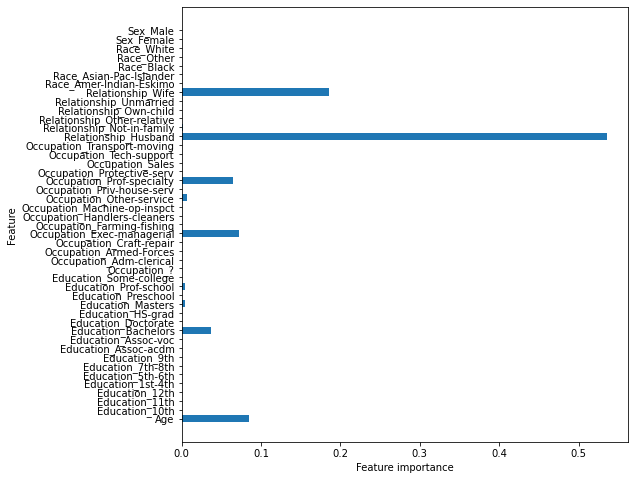

In [49]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

### Model performance

Next, let's see how well our model performed on the test data. 

In the cell below:

* Use the model to generate predictions on the test set  
* Print out a `confusion_matrix` of the test set predictions 
* Print out a `classification_report` of the test set predictions 

              precision    recall  f1-score   support

       <=50K       0.93      0.76      0.83      6303
        >50K       0.49      0.79      0.61      1838

    accuracy                           0.77      8141
   macro avg       0.71      0.78      0.72      8141
weighted avg       0.83      0.77      0.78      8141



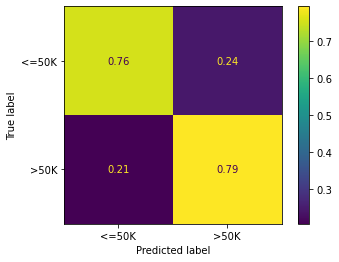

In [50]:
# Test set predictions
y_hat = tree_clf.predict(X_test)

# Confusion matrix and classification report
confustion_matrix = plot_confusion_matrix(tree_clf, X_test, y_test, normalize='true')
print(classification_report(y_test, y_hat))

Now, let's check the model's accuracy. Run the cell below to display the test set accuracy of the model. 

In [52]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_hat) * 100))

Testing Accuracy for Decision Tree Classifier: 76.6%


## Bagged trees

The first ensemble approach we'll try is a bag of trees. This will make use of **_Bagging_**, along with a number of decision tree classifier models.  

Now, let's instantiate a [`BaggingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).  First, initialize a `DecisionTreeClassifier` and set the same parameters that we did above for `criterion` and `max_depth`.  Also set the `n_estimators` parameter for our `BaggingClassifier` to `20`. 

In [55]:
# Instantiate a BaggingClassifier
bagged_tree = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 5, 
                                                                        random_state = 1, 
                                                                        class_weight = 'balanced'),
                                n_estimators = 20)

Great! Now, fit it to our training data. 

In [56]:
# Fit to the training data
bagged_tree.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=5,
                                                        random_state=1),
                  n_estimators=20)

Checking the accuracy of a model is such a common task that all (supervised learning) models have a `.score()` method that wraps the `accuracy_score()` helper function we've been using. All we have to do is pass it a dataset and the corresponding labels and it will return the accuracy score for those data/labels.  

Let's use it to get the training accuracy of our model. In the cell below, call the `.score()` method on our bagging model and pass in our training data and training labels as parameters. 

In [58]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.7436527436527437

Now, let's check the accuracy score that really matters -- our testing accuracy.  This time, pass in our testing data and labels to see how the model did.  

In [59]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.7392212258936248

## Random forests

Another popular ensemble method is the **_Random Forest_**. Let's fit a random forest classifier next and see how it measures up compared to all the others. 

### Fit a random forests model

In the cell below, instantiate and fit a `RandomForestClassifier`, and set the number estimators to `100` and the max depth to `5`. Then, fit the model to our training data. 

In [61]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(max_depth = 5, class_weight = 'balanced', random_state = 1)
forest.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=1)

Now, let's check the training and testing accuracy of the model using its `.score()` method: 

In [62]:
# Training accuracy score
forest.score(X_test, y_test)

0.7394668959587274

In [63]:
# Test accuracy score
forest.score(X_train, y_train)

0.7458640458640459

### Feature importance

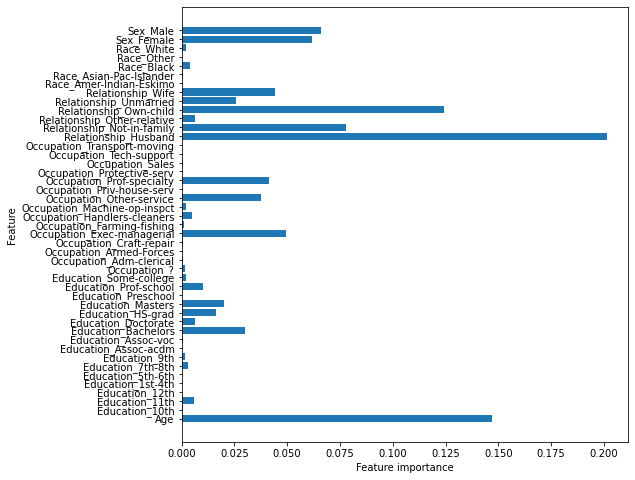

In [64]:
plot_feature_importances(forest)

Note: "relationship" represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has one relationship, so it is a bit of a weird attribute.

Also note that more features show up. This is a pretty typical result. 

### Look at the trees in your forest

Let's create a forest with some small trees. You'll learn how to access trees in your forest!

In the cell below, create another `RandomForestClassifier`.  Set the number of estimators to 5, the `max_features` to 10, and the `max_depth` to 2.

In [66]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 5, 
                                  max_features = 10, 
                                  max_depth = 2, 
                                  random_state = 1, 
                                  class_weight = 'balanced')
forest_2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=10,
                       n_estimators=5, random_state=1)

Making `max_features` smaller will lead to very different trees in your forest! The trees in your forest are stored in the `.estimators_` attribute.

In the cell below, get the first tree from `forest_2.estimators_` and store it in `rf_tree_1`

In [69]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_
rf_tree_1

[DecisionTreeClassifier(max_depth=2, max_features=10, random_state=1791095845),
 DecisionTreeClassifier(max_depth=2, max_features=10, random_state=2135392491),
 DecisionTreeClassifier(max_depth=2, max_features=10, random_state=946286476),
 DecisionTreeClassifier(max_depth=2, max_features=10, random_state=1857819720),
 DecisionTreeClassifier(max_depth=2, max_features=10, random_state=491263)]

Now, we can reuse our `plot_feature_importances()` function to visualize which features this tree was given to use duing subspace sampling. 

In the cell below, call `plot_feature_importances()` on `rf_tree_1`.

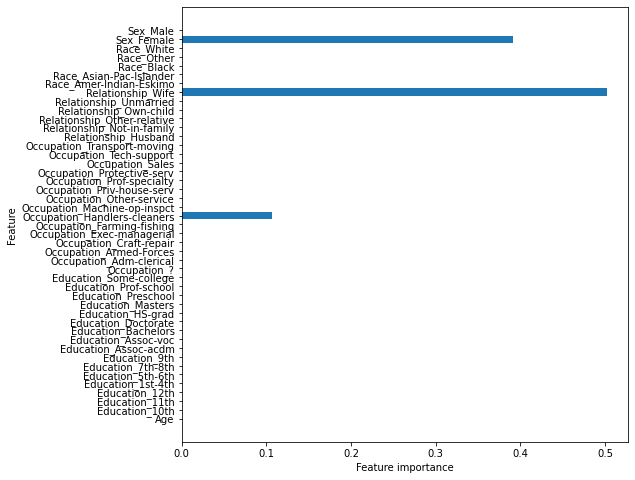

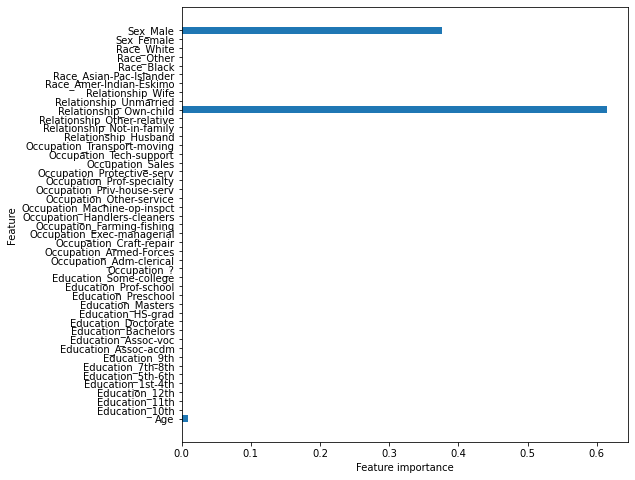

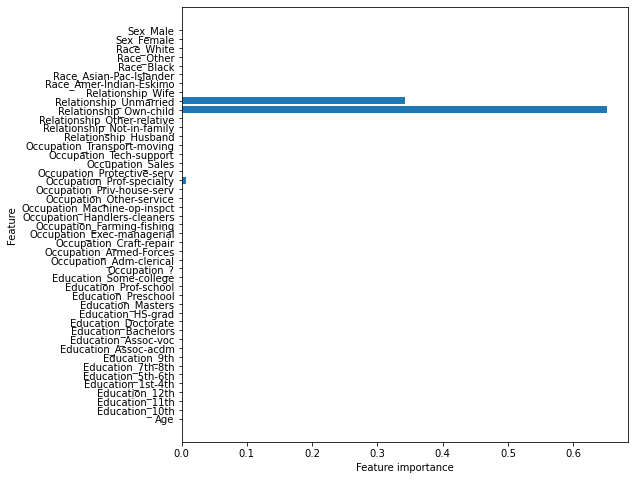

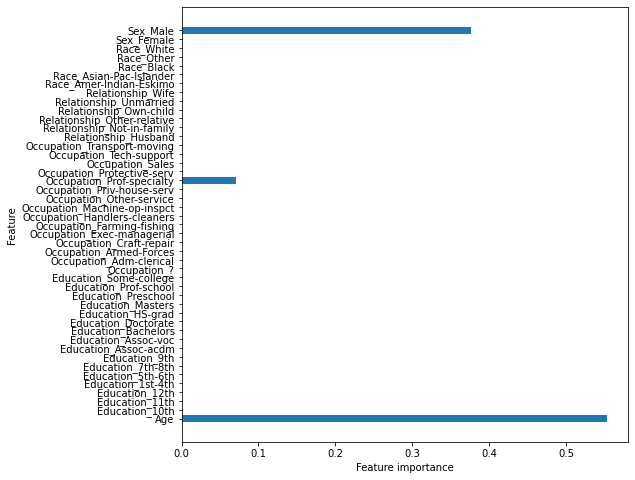

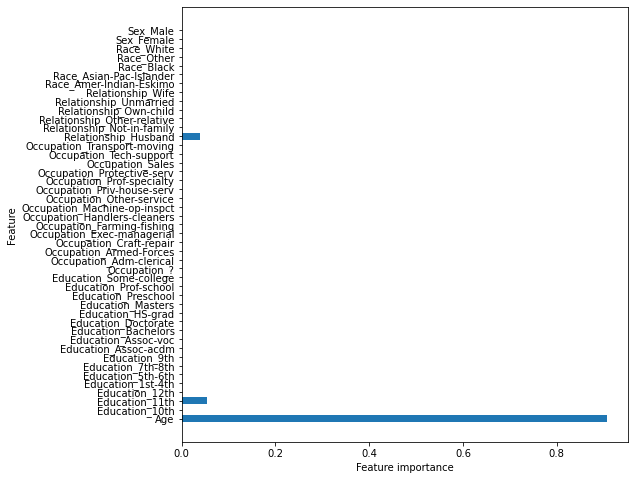

In [70]:
# Feature importance
for x in rf_tree_1:
    plot_feature_importances(x)

Now, grab the second tree and store it in `rf_tree_2`, and then pass it to `plot_feature_importances()` in the following cell so we can compare which features were most useful to each. 

In [ ]:
# Second tree from forest_2
rf_tree_2 = None

In [ ]:
# Feature importance

We can see by comparing the two plots that the two trees we examined from our random forest look at different attributes, and have wildly different feature importances!

## Summary

In this lab, we got some practice creating a few different tree ensemble methods. We also learned how to visualize feature importances, and compared individual trees from a random forest to see if we could notice the differences in the features they were trained on. 